In [1]:
#Ashadur Omith
#Project Milestone 1

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 

import statsmodels.formula.api as smf
import numpy as np
%matplotlib inline

In [3]:
dmv = pd.read_csv("rows.csv")
dmv

/Users/ashaduromith/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,10/30/2020,10:00,BROOKLYN,11215,40.668293,-73.979240,"(40.668293, -73.97924)",NaN,NaN,506 6 STREET,...,NaN,NaN,NaN,NaN,4362870,Ambulance,NaN,NaN,NaN,NaN
1,09/29/2020,5:30,NaN,NaN,40.673107,-73.999590,"(40.673107, -73.99959)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,...,Driver Inattention/Distraction,Unspecified,NaN,NaN,4355070,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN,NaN
2,09/16/2020,11:00,NaN,NaN,NaN,NaN,NaN,ROCKAWAY BOULEVARD,BROOKVILLE BOULEVARD,NaN,...,Unspecified,NaN,NaN,NaN,4348585,Sedan,Sedan,NaN,NaN,NaN
3,10/09/2020,17:10,BRONX,10468,40.862747,-73.904940,"(40.862747, -73.90494)",WEST FORDHAM ROAD,UNIVERSITY AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4356755,Sedan,Sedan,NaN,NaN,NaN
4,05/03/2018,16:53,BROOKLYN,11223,40.595753,-73.964676,"(40.595753, -73.964676)",NaN,NaN,620 AVENUE V,...,NaN,NaN,NaN,NaN,3894635,Sedan,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1760592,07/20/2012,22:15,NaN,NaN,40.869591,-73.820392,"(40.8695913, -73.8203916)",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2912166,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
1760593,07/23/2012,21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT OF 212-02 UION TURNPIKE,...,Backing Unsafely,NaN,NaN,NaN,259542,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
1760594,07/22/2012,18:05,QUEENS,11372,40.752374,-73.879103,"(40.7523742, -73.8791033)",88 STREET,35 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,279816,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN
1760595,07/21/2012,16:20,MANHATTAN,10005,40.704824,-74.006900,"(40.7048242, -74.0068996)",FRONT STREET,WALL STREET,NaN,...,NaN,NaN,NaN,NaN,214,PASSENGER VEHICLE,NaN,NaN,NaN,NaN


In [4]:
dmv.dtypes

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

In [5]:
dmv.columns = [c.replace(' ', '_') for c in dmv.columns]

In [6]:
del dmv["CONTRIBUTING_FACTOR_VEHICLE_3"]
del dmv["CONTRIBUTING_FACTOR_VEHICLE_4"]
del dmv["CONTRIBUTING_FACTOR_VEHICLE_5"]

In [7]:
dmv

,CRASH_DATE,CRASH_TIME,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,LOCATION,ON_STREET_NAME,CROSS_STREET_NAME,OFF_STREET_NAME,...,NUMBER_OF_MOTORIST_INJURED,NUMBER_OF_MOTORIST_KILLED,CONTRIBUTING_FACTOR_VEHICLE_1,CONTRIBUTING_FACTOR_VEHICLE_2,COLLISION_ID,VEHICLE_TYPE_CODE_1,VEHICLE_TYPE_CODE_2,VEHICLE_TYPE_CODE_3,VEHICLE_TYPE_CODE_4,VEHICLE_TYPE_CODE_5
0,10/30/2020,10:00,BROOKLYN,11215,40.668293,-73.979240,"(40.668293, -73.97924)",NaN,NaN,506 6 STREET,...,0,0,Oversized Vehicle,NaN,4362870,Ambulance,NaN,NaN,NaN,NaN
1,09/29/2020,5:30,NaN,NaN,40.673107,-73.999590,"(40.673107, -73.99959)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,...,2,0,Other Vehicular,Driver Inattention/Distraction,4355070,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN,NaN
2,09/16/2020,11:00,NaN,NaN,NaN,NaN,NaN,ROCKAWAY BOULEVARD,BROOKVILLE BOULEVARD,NaN,...,1,0,Unsafe Lane Changing,Unspecified,4348585,Sedan,Sedan,NaN,NaN,NaN
3,10/09/2020,17:10,BRONX,10468,40.862747,-73.904940,"(40.862747, -73.90494)",WEST FORDHAM ROAD,UNIVERSITY AVENUE,NaN,...,0,0,Failure to Yield Right-of-Way,Unspecified,4356755,Sedan,Sedan,NaN,NaN,NaN
4,05/03/2018,16:53,BROOKLYN,11223,40.595753,-73.964676,"(40.595753, -73.964676)",NaN,NaN,620 AVENUE V,...,0,0,Unspecified,NaN,3894635,Sedan,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1760592,07/20/2012,22:15,NaN,NaN,40.869591,-73.820392,"(40.8695913, -73.8203916)",NaN,NaN,NaN,...,0,0,Pavement Slippery,NaN,2912166,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
1760593,07/23/2012,21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRONT OF 212-02 UION TURNPIKE,...,0,0,Backing Unsafely,Backing Unsafely,259542,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
1760594,07/22/2012,18:05,QUEENS,11372,40.752374,-73.879103,"(40.7523742, -73.8791033)",88 STREET,35 AVENUE,NaN,...,1,0,Unspecified,Unspecified,279816,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN
1760595,07/21/2012,16:20,MANHATTAN,10005,40.704824,-74.006900,"(40.7048242, -74.0068996)",FRONT STREET,WALL STREET,NaN,...,0,0,Unspecified,NaN,214,PASSENGER VEHICLE,NaN,NaN,NaN,NaN


In [8]:
dmv["CRASH_DATE"] = pd.to_datetime(dmv["CRASH_DATE"])
dmv["CRASH_TIME"] = pd.to_datetime(dmv["CRASH_TIME"])

In [9]:
del dmv["OFF_STREET_NAME"]
del dmv["CONTRIBUTING_FACTOR_VEHICLE_2"]
del dmv["VEHICLE_TYPE_CODE_2"]
del dmv["VEHICLE_TYPE_CODE_3"]

del dmv["VEHICLE_TYPE_CODE_4"]
del dmv["VEHICLE_TYPE_CODE_5"]

In [10]:
dmv_cleaned = dmv.dropna()

In [11]:
dmv_cleaned.dtypes

CRASH_DATE                       datetime64[ns]
CRASH_TIME                       datetime64[ns]
BOROUGH                                  object
ZIP_CODE                                 object
LATITUDE                                float64
LONGITUDE                               float64
LOCATION                                 object
ON_STREET_NAME                           object
CROSS_STREET_NAME                        object
NUMBER_OF_PERSONS_INJURED               float64
NUMBER_OF_PERSONS_KILLED                float64
NUMBER_OF_PEDESTRIANS_INJURED             int64
NUMBER_OF_PEDESTRIANS_KILLED              int64
NUMBER_OF_CYCLIST_INJURED                 int64
NUMBER_OF_CYCLIST_KILLED                  int64
NUMBER_OF_MOTORIST_INJURED                int64
NUMBER_OF_MOTORIST_KILLED                 int64
CONTRIBUTING_FACTOR_VEHICLE_1            object
COLLISION_ID                              int64
VEHICLE_TYPE_CODE_1                      object
dtype: object

In [12]:
dmv_cleaned["year"] = dmv_cleaned["CRASH_DATE"].dt.year
dmv_cleaned["month"] = dmv_cleaned["CRASH_DATE"].dt.month_name()

<ipython-input-12-590249247be3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dmv_cleaned["year"] = dmv_cleaned["CRASH_DATE"].dt.year
<ipython-input-12-590249247be3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dmv_cleaned["month"] = dmv_cleaned["CRASH_DATE"].dt.month_name()


In [13]:
dmv_cleaned["hour"]= pd.to_datetime(dmv_cleaned["CRASH_TIME"]).dt.hour

<ipython-input-13-56a2a5fb6409>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dmv_cleaned["hour"]= pd.to_datetime(dmv_cleaned["CRASH_TIME"]).dt.hour


In [14]:
dmv_cleaned.head(20)

,CRASH_DATE,CRASH_TIME,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,LOCATION,ON_STREET_NAME,CROSS_STREET_NAME,NUMBER_OF_PERSONS_INJURED,...,NUMBER_OF_CYCLIST_INJURED,NUMBER_OF_CYCLIST_KILLED,NUMBER_OF_MOTORIST_INJURED,NUMBER_OF_MOTORIST_KILLED,CONTRIBUTING_FACTOR_VEHICLE_1,COLLISION_ID,VEHICLE_TYPE_CODE_1,year,month,hour
3,2020-10-09,2021-05-01 17:10:00,BRONX,10468,40.862747,-73.904940,"(40.862747, -73.90494)",WEST FORDHAM ROAD,UNIVERSITY AVENUE,0.0,...,0,0,0,0,Failure to Yield Right-of-Way,4356755,Sedan,2020,October,17
8,2018-05-01,2021-05-01 20:50:00,BROOKLYN,11236,40.632260,-73.900880,"(40.63226, -73.90088)",AVENUE M,EAST 87 STREET,1.0,...,1,0,0,0,Unspecified,3891730,Sedan,2018,May,20
14,2020-09-21,2021-05-01 22:13:00,BRONX,10473,40.827084,-73.849915,"(40.827084, -73.849915)",BRUCKNER EXPRESSWAY,CASTLE HILL AVENUE,0.0,...,0,0,0,0,Unspecified,4351554,Sedan,2020,September,22
16,2020-10-31,2021-05-01 12:09:00,QUEENS,11385,40.705590,-73.865990,"(40.70559, -73.86599)",83 STREET,78 AVENUE,0.0,...,0,0,0,0,Unspecified,4364491,Sedan,2020,October,12
18,2020-10-06,2021-05-01 19:05:00,QUEENS,11372,40.755070,-73.890020,"(40.75507, -73.89002)",77 STREET,NORTHERN BOULEVARD,1.0,...,0,0,1,0,Brakes Defective,4355416,Sedan,2020,October,19
19,2018-05-01,2021-05-01 15:00:00,BROOKLYN,11204,40.607765,-73.982550,"(40.607765, -73.98255)",AVENUE P,WEST 9 STREET,0.0,...,0,0,0,0,Driver Inattention/Distraction,3892952,Sedan,2018,May,15
20,2020-10-14,2021-05-01 12:55:00,MANHATTAN,10001,40.746037,-73.990524,"(40.746037, -73.990524)",AVENUE OF THE AMERICAS,WEST 28 STREET,0.0,...,0,0,0,0,Passing or Lane Usage Improper,4357778,Bus,2020,October,12
21,2020-10-01,2021-05-01 16:30:00,QUEENS,11101,40.755234,-73.941246,"(40.755234, -73.941246)",21 STREET,40 AVENUE,1.0,...,0,0,0,0,Driver Inattention/Distraction,4354304,Pick-up Truck,2020,October,16
27,2020-10-22,2021-05-01 17:45:00,BROOKLYN,11212,40.656210,-73.914665,"(40.65621, -73.914665)",ROCKAWAY PARKWAY,CHURCH AVENUE,1.0,...,0,0,1,0,Driver Inattention/Distraction,4360475,Sedan,2020,October,17
30,2020-10-01,2021-05-01 15:15:00,BROOKLYN,11232,40.654957,-74.007034,"(40.654957, -74.007034)",37 STREET,3 AVENUE,0.0,...,0,0,0,0,Unspecified,4353922,Sedan,2020,October,15


Text(0, 0.5, 'Collision Reports')

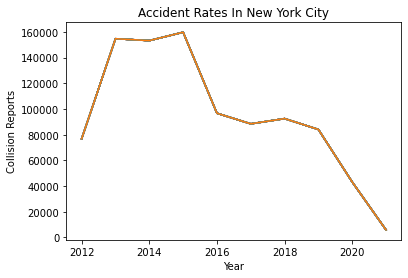

In [15]:
dmv_cleaned.groupby("year").count().plot(kind = "line", legend = False)
plt.title("Accident Rates In New York City")
plt.xlabel("Year")
plt.ylabel("Collision Reports")

In [16]:
#Above is a clear representation of the accident numbers vs years

Text(0, 0.5, 'Collision Reports')

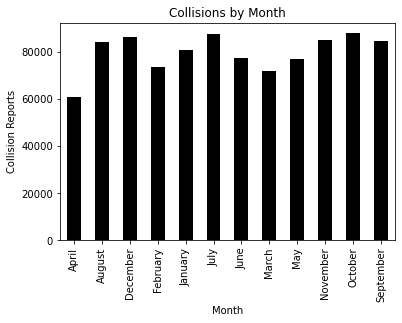

In [17]:
dmv_cleaned.groupby("month").count().plot(kind="bar", legend = False, color = "black")
plt.title("Collisions by Month")
plt.xlabel("Month")
plt.ylabel("Collision Reports")

In [18]:
#From this plot, i am observing that accidents dont really vary much by the seasons because july has higher rates than january. And january has higher incidents than April.


Text(0, 0.5, 'Collision Reports')

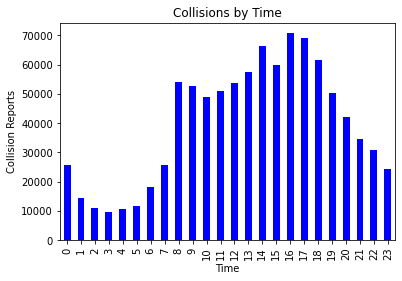

In [19]:
dmv_cleaned.groupby("hour").count().plot(kind="bar", legend = False, color = "blue")
plt.title("Collisions by Time")
plt.xlabel("Time")
plt.ylabel("Collision Reports")


In [20]:
#Looking at the distribution of incidents per hour, it is evident that the most accidents occur at 5PM, the time when everybody in the city is rushing home

Text(0, 0.5, 'Collision Reports')

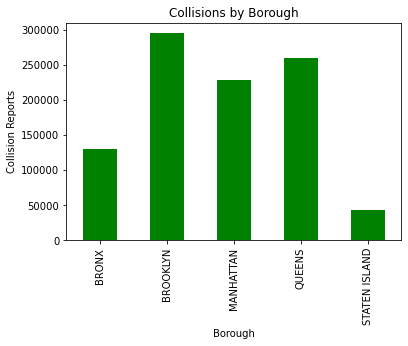

In [21]:
dmv_cleaned.groupby("BOROUGH").count().plot(kind="bar", color = "green", legend = False)
plt.title("Collisions by Borough")
plt.xlabel("Borough")
plt.ylabel("Collision Reports")

In [22]:
#In this graph, we can see all the total incidents per Borough.

In [23]:
dmv_cleaned["NUMBER_OF_PERSONS_KILLED"].sum()

1253.0

In [24]:
dmv_cleaned["NUMBER_OF_PERSONS_INJURED"].sum()

267389.0

Text(0, 0.5, 'Number of People')

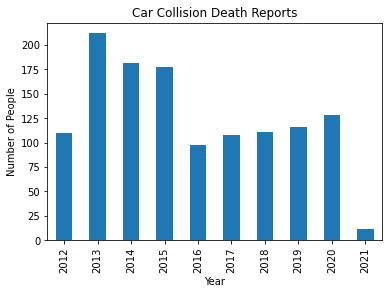

In [25]:
yearDeath = dmv_cleaned.groupby(dmv_cleaned["year"]).sum()["NUMBER_OF_PERSONS_KILLED"]
yearDeath.plot(kind = "bar")

plt.title("Car Collision Death Reports")
plt.xlabel("Year")
plt.ylabel("Number of People")

In [26]:
dmv_grouped_year = dmv_cleaned.groupby(dmv_cleaned["year"]).sum()

Text(0, 0.5, 'Collision Reports')

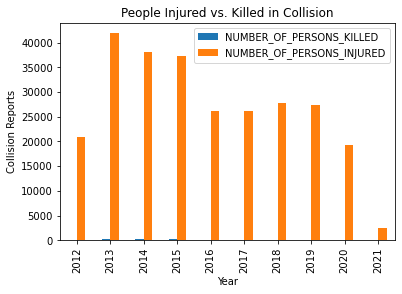

In [27]:
dmv_grouped_year[["NUMBER_OF_PERSONS_KILLED","NUMBER_OF_PERSONS_INJURED"]].plot(kind = "bar")
plt.title("People Injured vs. Killed in Collision")
plt.xlabel("Year")
plt.ylabel("Collision Reports")

In [28]:
# By looking at this chart, i can tell that in the accidents reported people were mostly injured instead of rather killed

In [29]:
#MILESTONE 02 *********************************

In [30]:
df = dmv_cleaned
df

,CRASH_DATE,CRASH_TIME,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,LOCATION,ON_STREET_NAME,CROSS_STREET_NAME,NUMBER_OF_PERSONS_INJURED,...,NUMBER_OF_CYCLIST_INJURED,NUMBER_OF_CYCLIST_KILLED,NUMBER_OF_MOTORIST_INJURED,NUMBER_OF_MOTORIST_KILLED,CONTRIBUTING_FACTOR_VEHICLE_1,COLLISION_ID,VEHICLE_TYPE_CODE_1,year,month,hour
3,2020-10-09,2021-05-01 17:10:00,BRONX,10468,40.862747,-73.904940,"(40.862747, -73.90494)",WEST FORDHAM ROAD,UNIVERSITY AVENUE,0.0,...,0,0,0,0,Failure to Yield Right-of-Way,4356755,Sedan,2020,October,17
8,2018-05-01,2021-05-01 20:50:00,BROOKLYN,11236,40.632260,-73.900880,"(40.63226, -73.90088)",AVENUE M,EAST 87 STREET,1.0,...,1,0,0,0,Unspecified,3891730,Sedan,2018,May,20
14,2020-09-21,2021-05-01 22:13:00,BRONX,10473,40.827084,-73.849915,"(40.827084, -73.849915)",BRUCKNER EXPRESSWAY,CASTLE HILL AVENUE,0.0,...,0,0,0,0,Unspecified,4351554,Sedan,2020,September,22
16,2020-10-31,2021-05-01 12:09:00,QUEENS,11385,40.705590,-73.865990,"(40.70559, -73.86599)",83 STREET,78 AVENUE,0.0,...,0,0,0,0,Unspecified,4364491,Sedan,2020,October,12
18,2020-10-06,2021-05-01 19:05:00,QUEENS,11372,40.755070,-73.890020,"(40.75507, -73.89002)",77 STREET,NORTHERN BOULEVARD,1.0,...,0,0,1,0,Brakes Defective,4355416,Sedan,2020,October,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1760590,2012-07-21,2021-05-01 09:10:00,MANHATTAN,10016,40.745921,-73.986394,"(40.7459208, -73.9863943)",WEST 30 STREET,5 AVENUE,0.0,...,0,0,0,0,Unspecified,26244,PICK-UP TRUCK,2012,July,9
1760591,2012-07-24,2021-05-01 10:10:00,QUEENS,11372,40.747631,-73.883937,"(40.7476308, -73.8839372)",82 STREET,ROOSEVELT AVENUE,1.0,...,0,0,0,0,Unspecified,255149,MOTORCYCLE,2012,July,10
1760594,2012-07-22,2021-05-01 18:05:00,QUEENS,11372,40.752374,-73.879103,"(40.7523742, -73.8791033)",88 STREET,35 AVENUE,1.0,...,0,0,1,0,Unspecified,279816,PASSENGER VEHICLE,2012,July,18
1760595,2012-07-21,2021-05-01 16:20:00,MANHATTAN,10005,40.704824,-74.006900,"(40.7048242, -74.0068996)",FRONT STREET,WALL STREET,0.0,...,0,0,0,0,Unspecified,214,PASSENGER VEHICLE,2012,July,16


In [31]:
#Creating dummy variables for the boroughs
df = pd.get_dummies(df, columns = ["BOROUGH"])
del df["ON_STREET_NAME"] 
df.head()

,CRASH_DATE,CRASH_TIME,ZIP_CODE,LATITUDE,LONGITUDE,LOCATION,CROSS_STREET_NAME,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED,NUMBER_OF_PEDESTRIANS_INJURED,...,COLLISION_ID,VEHICLE_TYPE_CODE_1,year,month,hour,BOROUGH_BRONX,BOROUGH_BROOKLYN,BOROUGH_MANHATTAN,BOROUGH_QUEENS,BOROUGH_STATEN ISLAND
3,2020-10-09,2021-05-01 17:10:00,10468,40.862747,-73.904940,"(40.862747, -73.90494)",UNIVERSITY AVENUE,0.0,0.0,0,...,4356755,Sedan,2020,October,17,1,0,0,0,0
8,2018-05-01,2021-05-01 20:50:00,11236,40.632260,-73.900880,"(40.63226, -73.90088)",EAST 87 STREET,1.0,0.0,0,...,3891730,Sedan,2018,May,20,0,1,0,0,0
14,2020-09-21,2021-05-01 22:13:00,10473,40.827084,-73.849915,"(40.827084, -73.849915)",CASTLE HILL AVENUE,0.0,0.0,0,...,4351554,Sedan,2020,September,22,1,0,0,0,0
16,2020-10-31,2021-05-01 12:09:00,11385,40.705590,-73.865990,"(40.70559, -73.86599)",78 AVENUE,0.0,0.0,0,...,4364491,Sedan,2020,October,12,0,0,0,1,0
18,2020-10-06,2021-05-01 19:05:00,11372,40.755070,-73.890020,"(40.75507, -73.89002)",NORTHERN BOULEVARD,1.0,0.0,0,...,4355416,Sedan,2020,October,19,0,0,0,1,0


In [32]:
lm = smf.ols("NUMBER_OF_PERSONS_INJURED ~ hour + BOROUGH_BRONX + BOROUGH_BROOKLYN + BOROUGH_MANHATTAN + BOROUGH_QUEENS", data = df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     NUMBER_OF_PERSONS_INJURED   R-squared:                       0.007
Model:                                   OLS   Adj. R-squared:                  0.007
Method:                        Least Squares   F-statistic:                     1351.
Date:                       Sat, 01 May 2021   Prob (F-statistic):               0.00
Time:                               21:28:11   Log-Likelihood:            -9.6916e+05
No. Observations:                     955343   AIC:                         1.938e+06
Df Residuals:                         955337   BIC:                         1.938e+06
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.2499      0.004     68.591      0.000       0.243       0.257
hour                  0.0021      0.000     16.952      0.000       0.002       0.002
BOROUGH_BRONX         0.0417      0.004     11.188      0.000       0.034       0.049
BOROUGH_BROOKLYN      0.0471      0.003     13.592      0.000       0.040       0.054
BOROUGH_MANHATTAN    -0.0922      0.004    -26.155      0.000      -0.099      -0.085
BOROUGH_QUEENS        0.0143      0.003      4.090      0.000       0.007       0.021
==============================================================================
Omnibus:                   967302.910   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        166270593.350
Skew:                           4.639   Prob(JB):                         0.00
Kurtosis:                      66.961   Cond. No.                         158.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#creating dataframe for injury rate at 5pm in the bronx
crash_df = pd.DataFrame({"hour":[17], "BOROUGH_BROOKLYN":[0], "BOROUGH_BRONX":[1], "BOROUGH_BROOKLYN":[0], "BOROUGH_MANHATTAN":[0], "BOROUGH_QUEENS":[0]})
crash_df

,hour,BOROUGH_BROOKLYN,BOROUGH_BRONX,BOROUGH_MANHATTAN,BOROUGH_QUEENS
0,17,0,1,0,0


In [34]:
#the result is 0.327
lm.predict(crash_df)

0    0.32707
dtype: float64

In [35]:
#creating dataframe for injury rate at 3am in the bronx
crash2_df = pd.DataFrame({"hour":[3], "BOROUGH_BROOKLYN":[0], "BOROUGH_BRONX":[1], "BOROUGH_BROOKLYN":[0], "BOROUGH_MANHATTAN":[0], "BOROUGH_QUEENS":[0]})
crash2_df

,hour,BOROUGH_BROOKLYN,BOROUGH_BRONX,BOROUGH_MANHATTAN,BOROUGH_QUEENS
0,3,0,1,0,0


In [36]:
#the result is 0.297
lm.predict(crash2_df)

0    0.297907
dtype: float64

In [37]:
#Performing linear regression with different subsets 
#repeating steps c and d

In [38]:
df

,CRASH_DATE,CRASH_TIME,ZIP_CODE,LATITUDE,LONGITUDE,LOCATION,CROSS_STREET_NAME,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED,NUMBER_OF_PEDESTRIANS_INJURED,...,COLLISION_ID,VEHICLE_TYPE_CODE_1,year,month,hour,BOROUGH_BRONX,BOROUGH_BROOKLYN,BOROUGH_MANHATTAN,BOROUGH_QUEENS,BOROUGH_STATEN ISLAND
3,2020-10-09,2021-05-01 17:10:00,10468,40.862747,-73.904940,"(40.862747, -73.90494)",UNIVERSITY AVENUE,0.0,0.0,0,...,4356755,Sedan,2020,October,17,1,0,0,0,0
8,2018-05-01,2021-05-01 20:50:00,11236,40.632260,-73.900880,"(40.63226, -73.90088)",EAST 87 STREET,1.0,0.0,0,...,3891730,Sedan,2018,May,20,0,1,0,0,0
14,2020-09-21,2021-05-01 22:13:00,10473,40.827084,-73.849915,"(40.827084, -73.849915)",CASTLE HILL AVENUE,0.0,0.0,0,...,4351554,Sedan,2020,September,22,1,0,0,0,0
16,2020-10-31,2021-05-01 12:09:00,11385,40.705590,-73.865990,"(40.70559, -73.86599)",78 AVENUE,0.0,0.0,0,...,4364491,Sedan,2020,October,12,0,0,0,1,0
18,2020-10-06,2021-05-01 19:05:00,11372,40.755070,-73.890020,"(40.75507, -73.89002)",NORTHERN BOULEVARD,1.0,0.0,0,...,4355416,Sedan,2020,October,19,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1760590,2012-07-21,2021-05-01 09:10:00,10016,40.745921,-73.986394,"(40.7459208, -73.9863943)",5 AVENUE,0.0,0.0,0,...,26244,PICK-UP TRUCK,2012,July,9,0,0,1,0,0
1760591,2012-07-24,2021-05-01 10:10:00,11372,40.747631,-73.883937,"(40.7476308, -73.8839372)",ROOSEVELT AVENUE,1.0,0.0,1,...,255149,MOTORCYCLE,2012,July,10,0,0,0,1,0
1760594,2012-07-22,2021-05-01 18:05:00,11372,40.752374,-73.879103,"(40.7523742, -73.8791033)",35 AVENUE,1.0,0.0,0,...,279816,PASSENGER VEHICLE,2012,July,18,0,0,0,1,0
1760595,2012-07-21,2021-05-01 16:20:00,10005,40.704824,-74.006900,"(40.7048242, -74.0068996)",WALL STREET,0.0,0.0,0,...,214,PASSENGER VEHICLE,2012,July,16,0,0,1,0,0


In [39]:
lm = smf.ols("NUMBER_OF_PERSONS_INJURED ~ hour + BOROUGH_BRONX + BOROUGH_BROOKLYN + BOROUGH_MANHATTAN + BOROUGH_QUEENS", data = df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     NUMBER_OF_PERSONS_INJURED   R-squared:                       0.007
Model:                                   OLS   Adj. R-squared:                  0.007
Method:                        Least Squares   F-statistic:                     1351.
Date:                       Sat, 01 May 2021   Prob (F-statistic):               0.00
Time:                               21:28:12   Log-Likelihood:            -9.6916e+05
No. Observations:                     955343   AIC:                         1.938e+06
Df Residuals:                         955337   BIC:                         1.938e+06
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.2499      0.004     68.591      0.000       0.243       0.257
hour                  0.0021      0.000     16.952      0.000       0.002       0.002
BOROUGH_BRONX         0.0417      0.004     11.188      0.000       0.034       0.049
BOROUGH_BROOKLYN      0.0471      0.003     13.592      0.000       0.040       0.054
BOROUGH_MANHATTAN    -0.0922      0.004    -26.155      0.000      -0.099      -0.085
BOROUGH_QUEENS        0.0143      0.003      4.090      0.000       0.007       0.021
==============================================================================
Omnibus:                   967302.910   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        166270593.350
Skew:                           4.639   Prob(JB):                         0.00
Kurtosis:                      66.961   Cond. No.                         158.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
lm2 = smf.ols("NUMBER_OF_PERSONS_INJURED ~ hour + BOROUGH_BRONX + BOROUGH_BROOKLYN + BOROUGH_QUEENS", data = df).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     NUMBER_OF_PERSONS_INJURED   R-squared:                       0.006
Model:                                   OLS   Adj. R-squared:                  0.006
Method:                        Least Squares   F-statistic:                     1517.
Date:                       Sat, 01 May 2021   Prob (F-statistic):               0.00
Time:                               21:28:13   Log-Likelihood:            -9.6951e+05
No. Observations:                     955343   AIC:                         1.939e+06
Df Residuals:                         955338   BIC:                         1.939e+06
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1718      0.002     82.361      0.000       0.168       0.176
hour                 0.0021      0.000     17.191      0.000       0.002       0.002
BOROUGH_BRONX        0.1195      0.002     53.043      0.000       0.115       0.124
BOROUGH_BROOKLYN     0.1248      0.002     70.278      0.000       0.121       0.128
BOROUGH_QUEENS       0.0920      0.002     50.201      0.000       0.088       0.096
==============================================================================
Omnibus:                   967547.980   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        166114042.801
Skew:                           4.642   Prob(JB):                         0.00
Kurtosis:                      66.929   Cond. No.                         64.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
lm3 = smf.ols("NUMBER_OF_PERSONS_INJURED ~ BOROUGH_BRONX + BOROUGH_BROOKLYN + BOROUGH_QUEENS", data = df).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     NUMBER_OF_PERSONS_INJURED   R-squared:                       0.006
Model:                                   OLS   Adj. R-squared:                  0.006
Method:                        Least Squares   F-statistic:                     1923.
Date:                       Sat, 01 May 2021   Prob (F-statistic):               0.00
Time:                               21:28:13   Log-Likelihood:            -9.6965e+05
No. Observations:                     955343   AIC:                         1.939e+06
Df Residuals:                         955339   BIC:                         1.939e+06
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2000      0.001    156.016      0.000       0.198       0.203
BOROUGH_BRONX        0.1194      0.002     52.983      0.000       0.115       0.124
BOROUGH_BROOKLYN     0.1250      0.002     70.364      0.000       0.122       0.128
BOROUGH_QUEENS       0.0922      0.002     50.265      0.000       0.089       0.096
==============================================================================
Omnibus:                   967401.260   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        165921383.574
Skew:                           4.641   Prob(JB):                         0.00
Kurtosis:                      66.891   Cond. No.                         4.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
#MODEL 2 (PROJECT PART 2) BEGINS HERE

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
    
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline

pd.set_option('display.max_columns', None)

In [44]:
del df["CROSS_STREET_NAME"]
del df["LOCATION"]
del df["CRASH_DATE"]
del df["CRASH_TIME"]
del df["ZIP_CODE"]

In [45]:
df

,LATITUDE,LONGITUDE,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED,NUMBER_OF_PEDESTRIANS_INJURED,NUMBER_OF_PEDESTRIANS_KILLED,NUMBER_OF_CYCLIST_INJURED,NUMBER_OF_CYCLIST_KILLED,NUMBER_OF_MOTORIST_INJURED,NUMBER_OF_MOTORIST_KILLED,CONTRIBUTING_FACTOR_VEHICLE_1,COLLISION_ID,VEHICLE_TYPE_CODE_1,year,month,hour,BOROUGH_BRONX,BOROUGH_BROOKLYN,BOROUGH_MANHATTAN,BOROUGH_QUEENS,BOROUGH_STATEN ISLAND
3,40.862747,-73.904940,0.0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,4356755,Sedan,2020,October,17,1,0,0,0,0
8,40.632260,-73.900880,1.0,0.0,0,0,1,0,0,0,Unspecified,3891730,Sedan,2018,May,20,0,1,0,0,0
14,40.827084,-73.849915,0.0,0.0,0,0,0,0,0,0,Unspecified,4351554,Sedan,2020,September,22,1,0,0,0,0
16,40.705590,-73.865990,0.0,0.0,0,0,0,0,0,0,Unspecified,4364491,Sedan,2020,October,12,0,0,0,1,0
18,40.755070,-73.890020,1.0,0.0,0,0,0,0,1,0,Brakes Defective,4355416,Sedan,2020,October,19,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1760590,40.745921,-73.986394,0.0,0.0,0,0,0,0,0,0,Unspecified,26244,PICK-UP TRUCK,2012,July,9,0,0,1,0,0
1760591,40.747631,-73.883937,1.0,0.0,1,0,0,0,0,0,Unspecified,255149,MOTORCYCLE,2012,July,10,0,0,0,1,0
1760594,40.752374,-73.879103,1.0,0.0,0,0,0,0,1,0,Unspecified,279816,PASSENGER VEHICLE,2012,July,18,0,0,0,1,0
1760595,40.704824,-74.006900,0.0,0.0,0,0,0,0,0,0,Unspecified,214,PASSENGER VEHICLE,2012,July,16,0,0,1,0,0


In [46]:
df = pd.get_dummies(df, columns = ["CONTRIBUTING_FACTOR_VEHICLE_1", "VEHICLE_TYPE_CODE_1", "month"], drop_first = True)
df

,LATITUDE,LONGITUDE,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED,NUMBER_OF_PEDESTRIANS_INJURED,NUMBER_OF_PEDESTRIANS_KILLED,NUMBER_OF_CYCLIST_INJURED,NUMBER_OF_CYCLIST_KILLED,NUMBER_OF_MOTORIST_INJURED,NUMBER_OF_MOTORIST_KILLED,COLLISION_ID,year,hour,BOROUGH_BRONX,BOROUGH_BROOKLYN,BOROUGH_MANHATTAN,BOROUGH_QUEENS,BOROUGH_STATEN ISLAND,CONTRIBUTING_FACTOR_VEHICLE_1_Accelerator Defective,CONTRIBUTING_FACTOR_VEHICLE_1_Aggressive Driving/Road Rage,CONTRIBUTING_FACTOR_VEHICLE_1_Alcohol Involvement,CONTRIBUTING_FACTOR_VEHICLE_1_Animals Action,CONTRIBUTING_FACTOR_VEHICLE_1_Backing Unsafely,CONTRIBUTING_FACTOR_VEHICLE_1_Brakes Defective,CONTRIBUTING_FACTOR_VEHICLE_1_Cell Phone (hand-Held),CONTRIBUTING_FACTOR_VEHICLE_1_Cell Phone (hand-held),CONTRIBUTING_FACTOR_VEHICLE_1_Cell Phone (hands-free),CONTRIBUTING_FACTOR_VEHICLE_1_Driver Inattention/Distraction,CONTRIBUTING_FACTOR_VEHICLE_1_Driver Inexperience,CONTRIBUTING_FACTOR_VEHICLE_1_Driverless/Runaway Vehicle,CONTRIBUTING_FACTOR_VEHICLE_1_Drugs (Illegal),CONTRIBUTING_FACTOR_VEHICLE_1_Drugs (illegal),CONTRIBUTING_FACTOR_VEHICLE_1_Eating or Drinking,CONTRIBUTING_FACTOR_VEHICLE_1_Failure to Keep Right,CONTRIBUTING_FACTOR_VEHICLE_1_Failure to Yield Right-of-Way,CONTRIBUTING_FACTOR_VEHICLE_1_Fatigued/Drowsy,CONTRIBUTING_FACTOR_VEHICLE_1_Fell Asleep,CONTRIBUTING_FACTOR_VEHICLE_1_Following Too Closely,CONTRIBUTING_FACTOR_VEHICLE_1_Glare,CONTRIBUTING_FACTOR_VEHICLE_1_Headlights Defective,CONTRIBUTING_FACTOR_VEHICLE_1_Illnes,CONTRIBUTING_FACTOR_VEHICLE_1_Illness,CONTRIBUTING_FACTOR_VEHICLE_1_Lane Marking Improper/Inadequate,CONTRIBUTING_FACTOR_VEHICLE_1_Listening/Using Headphones,CONTRIBUTING_FACTOR_VEHICLE_1_Lost Consciousness,CONTRIBUTING_FACTOR_VEHICLE_1_Obstruction/Debris,CONTRIBUTING_FACTOR_VEHICLE_1_Other Electronic Device,CONTRIBUTING_FACTOR_VEHICLE_1_Other Lighting Defects,CONTRIBUTING_FACTOR_VEHICLE_1_Other Vehicular,CONTRIBUTING_FACTOR_VEHICLE_1_Outside Car Distraction,CONTRIBUTING_FACTOR_VEHICLE_1_Oversized Vehicle,CONTRIBUTING_FACTOR_VEHICLE_1_Passenger Distraction,CONTRIBUTING_FACTOR_VEHICLE_1_Passing Too Closely,CONTRIBUTING_FACTOR_VEHICLE_1_Passing or Lane Usage Improper,CONTRIBUTING_FACTOR_VEHICLE_1_Pavement Defective,CONTRIBUTING_FACTOR_VEHICLE_1_Pavement Slippery,CONTRIBUTING_FACTOR_VEHICLE_1_Pedestrian/Bicyclist/Other Pedestrian Error/Confusion,CONTRIBUTING_FACTOR_VEHICLE_1_Physical Disability,CONTRIBUTING_FACTOR_VEHICLE_1_Prescription Medication,CONTRIBUTING_FACTOR_VEHICLE_1_Reaction to Other Uninvolved Vehicle,CONTRIBUTING_FACTOR_VEHICLE_1_Reaction to Uninvolved Vehicle,CONTRIBUTING_FACTOR_VEHICLE_1_Shoulders Defective/Improper,CONTRIBUTING_FACTOR_VEHICLE_1_Steering Failure,CONTRIBUTING_FACTOR_VEHICLE_1_Texting,CONTRIBUTING_FACTOR_VEHICLE_1_Tinted Windows,CONTRIBUTING_FACTOR_VEHICLE_1_Tire Failure/Inadequate,CONTRIBUTING_FACTOR_VEHICLE_1_Tow Hitch Defective,CONTRIBUTING_FACTOR_VEHICLE_1_Traffic Control Device Improper/Non-Working,CONTRIBUTING_FACTOR_VEHICLE_1_Traffic Control Disregarded,CONTRIBUTING_FACTOR_VEHICLE_1_Turning Improperly,CONTRIBUTING_FACTOR_VEHICLE_1_Unsafe Lane Changing,CONTRIBUTING_FACTOR_VEHICLE_1_Unsafe Speed,CONTRIBUTING_FACTOR_VEHICLE_1_Unspecified,CONTRIBUTING_FACTOR_VEHICLE_1_Using On Board Navigation Device,CONTRIBUTING_FACTOR_VEHICLE_1_Vehicle Vandalism,CONTRIBUTING_FACTOR_VEHICLE_1_View Obstructed/Limited,CONTRIBUTING_FACTOR_VEHICLE_1_Windshield Inadequate,VEHICLE_TYPE_CODE_1_1,VEHICLE_TYPE_CODE_1_11111,VEHICLE_TYPE_CODE_1_12 Pa,VEHICLE_TYPE_CODE_1_15 Pa,VEHICLE_TYPE_CODE_1_18 WH,VEHICLE_TYPE_CODE_1_18 WHEELER,VEHICLE_TYPE_CODE_1_197209,VEHICLE_TYPE_CODE_1_2 DR,VEHICLE_TYPE_CODE_1_2 WHE,VEHICLE_TYPE_CODE_1_2 dr sedan,VEHICLE_TYPE_CODE_1_2000,VEHICLE_TYPE_CODE_1_26 ft,VEHICLE_TYPE_CODE_1_3 WHE,VEHICLE_TYPE_CODE_1_3 Whe,VEHICLE_TYPE_CODE_1_3-Door,VEHICLE_TYPE_CODE_1_315 e,VEHICLE_TYPE_CODE_1_3DOOR,VEHICLE_TYPE_CODE_1_4 RUN,VEHICLE_TYPE_CODE_1_4 dr sedan,VEHICLE_TYPE_CODE_1_4D,VEHICLE_TYPE_CODE_1_4DR,VEHICLE_TYPE_CODE_1_4DS,VEHICLE_TYPE_CODE_1_5X

In [47]:
#k-nearest neighbors regression

In [48]:
x = df.drop("NUMBER_OF_PERSONS_INJURED", axis = 1)
x

,LATITUDE,LONGITUDE,NUMBER_OF_PERSONS_KILLED,NUMBER_OF_PEDESTRIANS_INJURED,NUMBER_OF_PEDESTRIANS_KILLED,NUMBER_OF_CYCLIST_INJURED,NUMBER_OF_CYCLIST_KILLED,NUMBER_OF_MOTORIST_INJURED,NUMBER_OF_MOTORIST_KILLED,COLLISION_ID,year,hour,BOROUGH_BRONX,BOROUGH_BROOKLYN,BOROUGH_MANHATTAN,BOROUGH_QUEENS,BOROUGH_STATEN ISLAND,CONTRIBUTING_FACTOR_VEHICLE_1_Accelerator Defective,CONTRIBUTING_FACTOR_VEHICLE_1_Aggressive Driving/Road Rage,CONTRIBUTING_FACTOR_VEHICLE_1_Alcohol Involvement,CONTRIBUTING_FACTOR_VEHICLE_1_Animals Action,CONTRIBUTING_FACTOR_VEHICLE_1_Backing Unsafely,CONTRIBUTING_FACTOR_VEHICLE_1_Brakes Defective,CONTRIBUTING_FACTOR_VEHICLE_1_Cell Phone (hand-Held),CONTRIBUTING_FACTOR_VEHICLE_1_Cell Phone (hand-held),CONTRIBUTING_FACTOR_VEHICLE_1_Cell Phone (hands-free),CONTRIBUTING_FACTOR_VEHICLE_1_Driver Inattention/Distraction,CONTRIBUTING_FACTOR_VEHICLE_1_Driver Inexperience,CONTRIBUTING_FACTOR_VEHICLE_1_Driverless/Runaway Vehicle,CONTRIBUTING_FACTOR_VEHICLE_1_Drugs (Illegal),CONTRIBUTING_FACTOR_VEHICLE_1_Drugs (illegal),CONTRIBUTING_FACTOR_VEHICLE_1_Eating or Drinking,CONTRIBUTING_FACTOR_VEHICLE_1_Failure to Keep Right,CONTRIBUTING_FACTOR_VEHICLE_1_Failure to Yield Right-of-Way,CONTRIBUTING_FACTOR_VEHICLE_1_Fatigued/Drowsy,CONTRIBUTING_FACTOR_VEHICLE_1_Fell Asleep,CONTRIBUTING_FACTOR_VEHICLE_1_Following Too Closely,CONTRIBUTING_FACTOR_VEHICLE_1_Glare,CONTRIBUTING_FACTOR_VEHICLE_1_Headlights Defective,CONTRIBUTING_FACTOR_VEHICLE_1_Illnes,CONTRIBUTING_FACTOR_VEHICLE_1_Illness,CONTRIBUTING_FACTOR_VEHICLE_1_Lane Marking Improper/Inadequate,CONTRIBUTING_FACTOR_VEHICLE_1_Listening/Using Headphones,CONTRIBUTING_FACTOR_VEHICLE_1_Lost Consciousness,CONTRIBUTING_FACTOR_VEHICLE_1_Obstruction/Debris,CONTRIBUTING_FACTOR_VEHICLE_1_Other Electronic Device,CONTRIBUTING_FACTOR_VEHICLE_1_Other Lighting Defects,CONTRIBUTING_FACTOR_VEHICLE_1_Other Vehicular,CONTRIBUTING_FACTOR_VEHICLE_1_Outside Car Distraction,CONTRIBUTING_FACTOR_VEHICLE_1_Oversized Vehicle,CONTRIBUTING_FACTOR_VEHICLE_1_Passenger Distraction,CONTRIBUTING_FACTOR_VEHICLE_1_Passing Too Closely,CONTRIBUTING_FACTOR_VEHICLE_1_Passing or Lane Usage Improper,CONTRIBUTING_FACTOR_VEHICLE_1_Pavement Defective,CONTRIBUTING_FACTOR_VEHICLE_1_Pavement Slippery,CONTRIBUTING_FACTOR_VEHICLE_1_Pedestrian/Bicyclist/Other Pedestrian Error/Confusion,CONTRIBUTING_FACTOR_VEHICLE_1_Physical Disability,CONTRIBUTING_FACTOR_VEHICLE_1_Prescription Medication,CONTRIBUTING_FACTOR_VEHICLE_1_Reaction to Other Uninvolved Vehicle,CONTRIBUTING_FACTOR_VEHICLE_1_Reaction to Uninvolved Vehicle,CONTRIBUTING_FACTOR_VEHICLE_1_Shoulders Defective/Improper,CONTRIBUTING_FACTOR_VEHICLE_1_Steering Failure,CONTRIBUTING_FACTOR_VEHICLE_1_Texting,CONTRIBUTING_FACTOR_VEHICLE_1_Tinted Windows,CONTRIBUTING_FACTOR_VEHICLE_1_Tire Failure/Inadequate,CONTRIBUTING_FACTOR_VEHICLE_1_Tow Hitch Defective,CONTRIBUTING_FACTOR_VEHICLE_1_Traffic Control Device Improper/Non-Working,CONTRIBUTING_FACTOR_VEHICLE_1_Traffic Control Disregarded,CONTRIBUTING_FACTOR_VEHICLE_1_Turning Improperly,CONTRIBUTING_FACTOR_VEHICLE_1_Unsafe Lane Changing,CONTRIBUTING_FACTOR_VEHICLE_1_Unsafe Speed,CONTRIBUTING_FACTOR_VEHICLE_1_Unspecified,CONTRIBUTING_FACTOR_VEHICLE_1_Using On Board Navigation Device,CONTRIBUTING_FACTOR_VEHICLE_1_Vehicle Vandalism,CONTRIBUTING_FACTOR_VEHICLE_1_View Obstructed/Limited,CONTRIBUTING_FACTOR_VEHICLE_1_Windshield Inadequate,VEHICLE_TYPE_CODE_1_1,VEHICLE_TYPE_CODE_1_11111,VEHICLE_TYPE_CODE_1_12 Pa,VEHICLE_TYPE_CODE_1_15 Pa,VEHICLE_TYPE_CODE_1_18 WH,VEHICLE_TYPE_CODE_1_18 WHEELER,VEHICLE_TYPE_CODE_1_197209,VEHICLE_TYPE_CODE_1_2 DR,VEHICLE_TYPE_CODE_1_2 WHE,VEHICLE_TYPE_CODE_1_2 dr sedan,VEHICLE_TYPE_CODE_1_2000,VEHICLE_TYPE_CODE_1_26 ft,VEHICLE_TYPE_CODE_1_3 WHE,VEHICLE_TYPE_CODE_1_3 Whe,VEHICLE_TYPE_CODE_1_3-Door,VEHICLE_TYPE_CODE_1_315 e,VEHICLE_TYPE_CODE_1_3DOOR,VEHICLE_TYPE_CODE_1_4 RUN,VEHICLE_TYPE_CODE_1_4 dr sedan,VEHICLE_TYPE_CODE_1_4D,VEHICLE_TYPE_CODE_1_4DR,VEHICLE_TYPE_CODE_1_4DS,VEHICLE_TYPE_CODE_1_5X8 T,VEHICLE_TYPE_CODE_1_99

In [49]:
y = df["NUMBER_OF_PERSONS_INJURED"]
y

3          0.0
8          1.0
14         0.0
16         0.0
18         1.0
          ... 
1760590    0.0
1760591    1.0
1760594    1.0
1760595    0.0
1760596    0.0
Name: NUMBER_OF_PERSONS_INJURED, Length: 955343, dtype: float64

In [50]:
#Using a proportion of 0.2 of the data for test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [51]:
#Fitting a k nearest neigbor regression model
knn = KNeighborsRegressor(n_neighbors = 7)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [52]:
y_test_pred = knn.predict(x_test)

In [53]:
#the mean squared error for the test data is 0.49433781855278064
mean_squared_error(y_test_pred, y_test)

0.49370923913478854

In [54]:
y_train_pred = knn.predict(x_train)
mean_squared_error(y_train_pred, y_train)

0.3638077122997826

In [55]:
mses = []
for k in range(1,10):
    print("Now computing MSE for k=",k)
    iknn_scaled = KNeighborsRegressor(n_neighbors = k)
    iknn_scaled.fit(x_train, y_train)
    iy_pred = iknn_scaled.predict(x_test)
    mse = mean_squared_error(iy_pred, y_test)
    mses.append(mse)

Now computing MSE for k= 1
Now computing MSE for k= 2
Now computing MSE for k= 3
Now computing MSE for k= 4
Now computing MSE for k= 5
Now computing MSE for k= 6
Now computing MSE for k= 7
Now computing MSE for k= 8
Now computing MSE for k= 9


Text(0.5, 1.0, 'MSE for different numbers of neighbors')

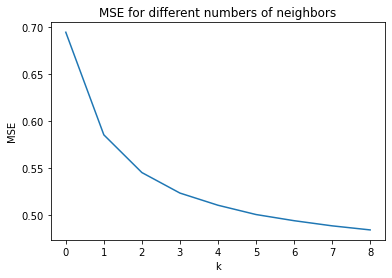

In [56]:
plt.plot(mses)
plt.xlabel("k")
plt.ylabel("MSE")
plt.title("MSE for different numbers of neighbors")

In [57]:
knn2 = KNeighborsRegressor(n_neighbors = 5)
knn2.fit(x_train, y_train)
mean_squared_error(y_test_pred, y_test)

0.49370923913478854

In [58]:
y_train_pred = knn2.predict(x_train)
mean_squared_error(y_train_pred, y_train)

0.3310264643308553

In [59]:
#MILESTONE 3 ---------------------------------------------------------

In [60]:
!pip install --user folium

In [61]:
import folium

In [67]:
bins_map = folium.Map(location = [40.7128, -74.0060])
bins_map

In [ ]:
for i in range(955342):
    row = df.loc[3]
    folium.Marker([row["LATITUDE"], row["LONGITUDE"]]).add_to(bins_map)
    
bins_map